In [38]:
import numpy as np
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model


In [26]:
x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x, y = np.array(x), np.array(y)

In [27]:
x = sm.add_constant(x)
print(x)
print(y)

[[ 1.  0.  1.]
 [ 1.  5.  1.]
 [ 1. 15.  2.]
 [ 1. 25.  5.]
 [ 1. 35. 11.]
 [ 1. 45. 15.]
 [ 1. 55. 34.]
 [ 1. 60. 35.]]
[ 4  5 20 14 32 22 38 43]


In [28]:
model = sm.OLS(y, x)
results = model.fit()


In [29]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     15.56
Date:                Mon, 01 Feb 2021   Prob (F-statistic):            0.00713
Time:                        16:48:02   Log-Likelihood:                -24.316
No. Observations:                   8   AIC:                             54.63
Df Residuals:                       5   BIC:                             54.87
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5226      4.431      1.246      0.2

In [30]:
print('coefficient of determination:', results.rsquared)

coefficient of determination: 0.8615939258756777


In [31]:
print('adjusted coefficient of determination:', results.rsquared_adj)

adjusted coefficient of determination: 0.8062314962259488


In [32]:
print('regression coefficients:', results.params)

regression coefficients: [5.52257928 0.44706965 0.25502548]


In [33]:
print('predicted response:', results.fittedvalues, sep='\n')
print('predicted response:', results.predict(x), sep='\n')

predicted response:
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]
predicted response:
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


In [36]:
file = '../data/unconv_MV_v5.csv'
df = pd.read_csv(file)
df.head(10)

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832
5,6,14.53,4.81,2.69,53.60,0.94,1.67,4395.763259
6,7,13.49,3.60,2.93,63.71,0.80,1.85,4104.400989
7,8,11.58,3.03,3.25,53.00,0.69,1.93,3496.742701
8,9,12.52,2.72,2.43,65.77,0.95,1.98,4025.851153
9,10,13.25,3.94,3.71,66.20,1.14,2.65,4285.026122


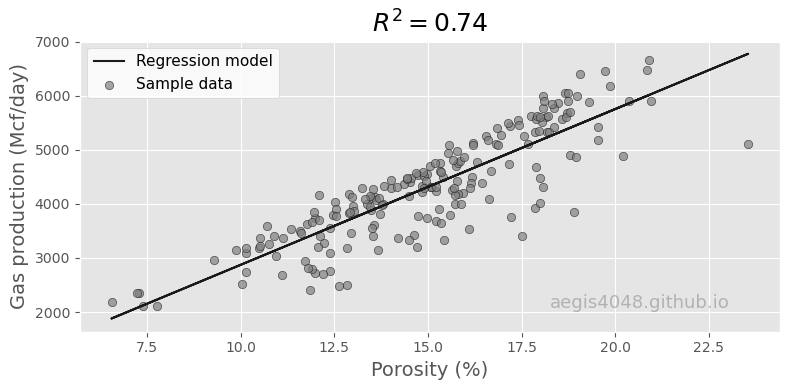

In [39]:
X = df['Por'].values.reshape(-1,1)
y = df['Prod'].values

################################################ Train #############################################

ols = linear_model.LinearRegression()
model = ols.fit(X, y)
response = model.predict(X)

############################################## Evaluate ############################################

r2 = model.score(X, y)

############################################## Plot ################################################

plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X, response, color='k', label='Regression model')
ax.scatter(X, y, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
ax.set_ylabel('Gas production (Mcf/day)', fontsize=14)
ax.set_xlabel('Porosity (%)', fontsize=14)
ax.text(0.8, 0.1, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='grey', alpha=0.5)
ax.legend(facecolor='white', fontsize=11)
ax.set_title('$R^2= %.2f$' % r2, fontsize=18)

fig.tight_layout()

In [40]:
features = ['Por']
target = 'Prod'

X = df[features].values.reshape(-1, len(features))
y = df[target].values

In [41]:
print(X.shape)
print(y.shape)

(200, 1)
(200,)


In [42]:
ols = linear_model.LinearRegression()
model = ols.fit(X, y)

In [44]:
model.coef_

array([287.78074285])

In [45]:
model.intercept_

-2.9444310537155616

In [46]:
model.score(X, y)

0.7428880535051593

In [47]:
x_pred = np.array([15])
x_pred = x_pred.reshape(-1, len(features))

In [48]:
model.predict(x_pred)

array([4313.76671169])

In [49]:
x_pred = np.array([14, 18])
x_pred = x_pred.reshape(-1, len(features))

In [50]:
model.predict(x_pred)

array([4025.98596884, 5177.10894024])

In [51]:
x_pred = np.linspace(0, 40, 200)            # 200 data points between 0 ~ 40
x_pred = x_pred.reshape(-1, len(features))  # preprocessing required by scikit-learn functions

y_pred = model.predict(x_pred)

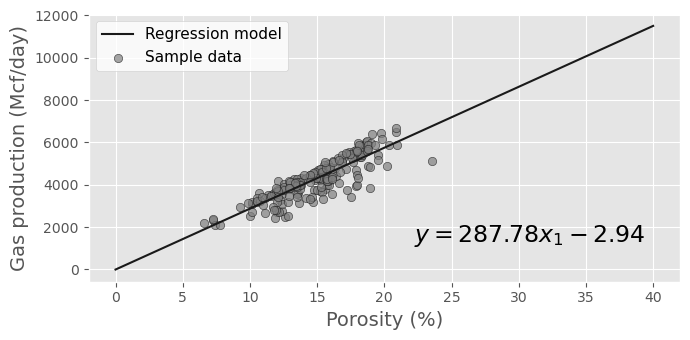

In [52]:
plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(7, 3.5))

ax.plot(x_pred, y_pred, color='k', label='Regression model')
ax.scatter(X, y, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
ax.set_ylabel('Gas production (Mcf/day)', fontsize=14)
ax.set_xlabel('Porosity (%)', fontsize=14)
ax.legend(facecolor='white', fontsize=11)
ax.text(0.55, 0.15, '$y = %.2f x_1 - %.2f $' % (model.coef_[0], abs(model.intercept_)), fontsize=17, transform=ax.transAxes)

fig.tight_layout()


In [53]:
features = ['Por', 'Brittle', 'Perm', 'TOC']
target = 'Prod'

X = df[features].values.reshape(-1, len(features))
y = df[target].values

ols = linear_model.LinearRegression()
model = ols.fit(X, y)

In [54]:
model.coef_

array([244.60011793,  31.58801063,  86.87367291, 325.19354135])

In [55]:
model.intercept_

-1575.2734966267135

In [56]:
model.score(X, y)

0.9516996043535946

In [57]:
x_pred = np.array([12, 81, 2.31, 2.8])
x_pred = x_pred.reshape(-1, len(features))